* 데이터 수집      
https://data.seoul.go.kr/dataList/5/literacyView.do

In [2]:
import pandas as pd

In [3]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 확인 및 전처리

## 2021년 공공자전거 대여이력 정보

### 데이터프레임 생성/확인

In [4]:
df1 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('test_data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

In [5]:
df6.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,03538,서울숲 IT캐슬,0,53.0,2502.8
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,01843,독산고등학교,0,22.0,1630.0


### 데이터 연결/확인
* concat

In [31]:
# concat
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [32]:
# head
df.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.0


In [33]:
#tail
df.tail(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


In [34]:
# 데이터 크기
df.shape

(13613873, 11)

In [35]:
df.size # 전체셀 개수

149752603

In [36]:
# 데이터 정보(사용메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


## 데이터 전처리

### 불필요한 컬럼 제거

In [37]:
# 자전거번호, 대여거치대, 반납거치대 제거
df.drop(columns=['자전거번호', '대여거치대', '반납거치대'], inplace=True, axis=1)

In [38]:
df.shape

(13613873, 8)

### 자료형 확인/변경

In [39]:
# 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 934.8+ MB


In [40]:
# 카테고리형으로 변경  :    대여 대여소번호, 반납대여소번호
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

In [41]:
# 메모리 용량 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [43]:
# datetime형으로 변경 : 대여일시,반납일시
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')

In [ ]:
# erros 오류 = 1. 무시, 2. 상승, 3. 강제  default가 상승
# raise 인경우 잘못된 구문 분석은 예외를 발생시킨다. 
# coerce 잘못된 구문 분석이 NaT로 설정 
# ignore  무시

In [44]:
# 자료형 변경 확인
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

## 결측치 확인/처리

In [46]:
# 결측치 확인
df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        146
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [47]:
# 결측치 제거
df = df.dropna() # df.dropna(inplace=True)

In [48]:
# 결측치 확인
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 일별 이용 현황

## 대여날짜 컬럼 추가
* date

In [50]:
df['대여날짜'] = df['대여일시'].dt.date

In [51]:
df.head(2)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.0,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.0,2021-01-04


## 대여날짜 별 대여 건수
* groupby
* to_frame

In [52]:
# 대여날짜 별 대여건수 추출
df_count = df.groupby('대여날짜').대여일시.count().to_frame()
df_count

,대여일시
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


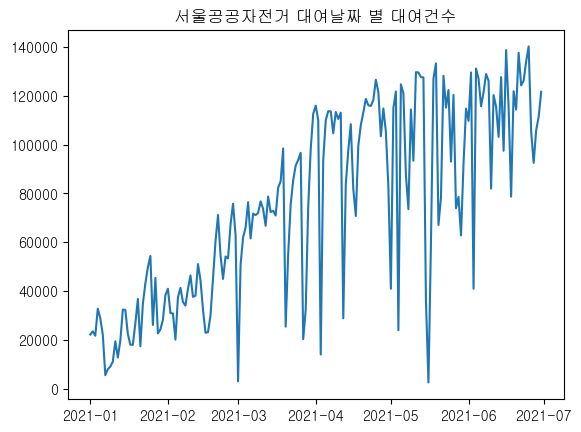

In [53]:
# 대여날짜 별 대여건수 시각화
plt.plot(df_count.index, df_count.values)
plt.title('서울공공자전거 대여날짜 별 대여건수')
plt.show()

## 대여날짜 별 이용시간
* groupby
* to_frame

In [54]:
# 대여날짜 별 이용시간 추출
df_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()
df_time

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


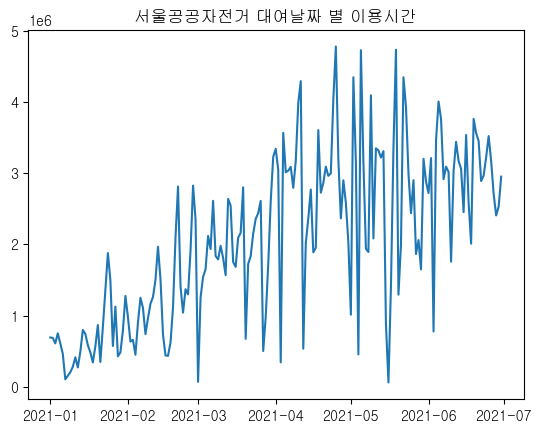

In [55]:
# 대여날짜 별 이용시간 시각화
plt.plot(df_time.index, df_time.values)
plt.title('서울공공자전거 대여날짜 별 이용시간')
plt.show()

## 대여날짜 별 이용 거리

In [56]:
# 대여날짜 별 이용거리 추출
df_distance = df.groupby('대여날짜')['이용거리'].sum().to_frame()
df_distance

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


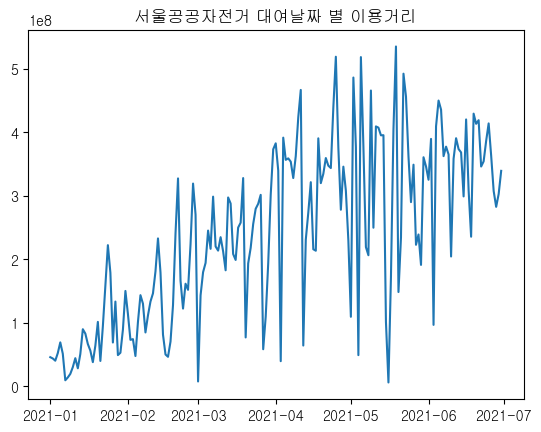

In [57]:
# 대여날짜 별 이용거리 시각화
plt.plot(df_distance.index, df_distance.values)
plt.title('서울공공자전거 대여날짜 별 이용거리')
plt.show()

## 데이터프레임 합치기

In [58]:
df_date = pd.concat([df_time, df_distance, df_count], axis=1)
df_date

,이용시간,이용거리,대여일시
대여날짜,,,
2021-01-01,692309.0,4.613529e+07,22119
2021-01-02,686580.0,4.409618e+07,23463
2021-01-03,609571.0,4.059830e+07,21656
2021-01-04,750721.0,5.249645e+07,32732
2021-01-05,610227.0,6.944856e+07,28819
...,...,...,...
2021-06-26,3168288.0,3.635015e+08,105414
2021-06-27,2706168.0,3.078146e+08,92486
2021-06-28,2405249.0,2.828124e+08,105882


# 시간대별 대여/반납 현황

## 대여시간, 반납시간 컬럼 추가

In [60]:
df['대여시간'] = df['대여일시'].dt.hour

In [61]:
df['반납시간'] = df['반납일시'].dt.hour

In [62]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
대여날짜                object
대여시간                 int32
반납시간                 int32
dtype: object

In [63]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18


## 시간대별 대여/반납 현황

In [69]:
# 시간대별 대여현황
s_rental = df['대여시간'].value_counts()
s_rental

대여시간
18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: count, dtype: int64

In [65]:
# 시간대별 반납현황
s_return = df['반납시간'].value_counts()
s_return

반납시간
18    1437723
19    1125447
17    1097623
16     880629
20     864644
8      817076
21     812357
22     768302
15     749940
14     657826
13     628908
12     591577
9      499033
11     470053
23     447477
10     402350
7      389007
0      290169
1      190954
6      152003
2      125912
3       80243
5       73983
4       60368
Name: count, dtype: int64

## 시각화

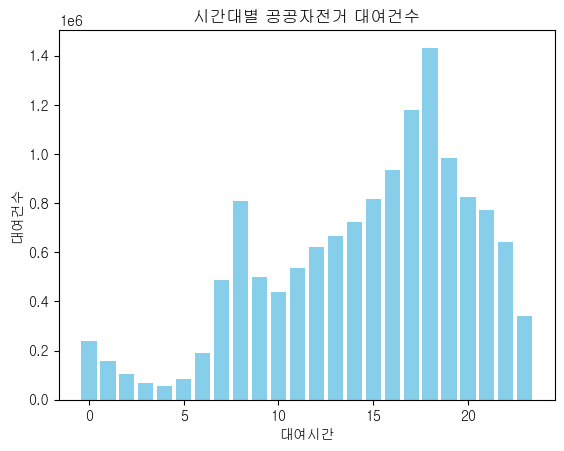

In [73]:
# 시간대별 공공자전거 대여건수 시각화
s_rental = s_rental.sort_index()
x = s_rental.index
y = s_rental.values
plt.bar(x, y, color='skyblue')
plt.title('시간대별 공공자전거 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

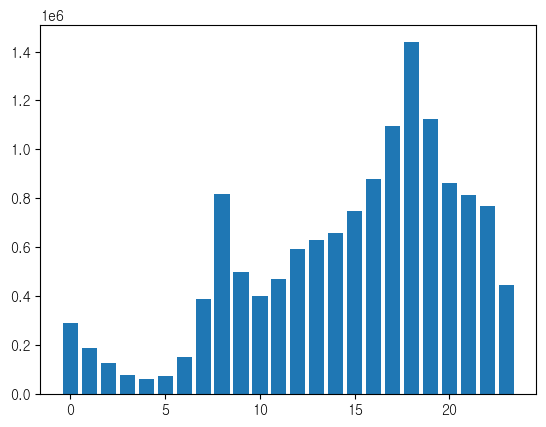

In [68]:
# 시간대별 공공자전거 반납건수 시각화
s_return = s_return.sort_index()
x = s_return.index
y = s_return.values
plt.bar(x, y)
plt.show()

# 대여소별 대여/반납 현황

## 대여소 현황

In [74]:
# 대여 대여소번호 갯수
df['대여 대여소번호']

0             3
1             3
2             3
3             3
4             3
           ... 
3445939     152
3445940     152
3445941     152
3445942    2220
3445943    2220
Name: 대여 대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [75]:
# 반납대여소번호 갯수
df['반납대여소번호']

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (4811, object): [3, 10, 101, 102, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [79]:
# 반납대여소 번호 처리 (str형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('str')

In [80]:
df.tail()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4,00126
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4,00437
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4,00437
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4,02526
3445943,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,403.0,4541.22,2021-06-30,22,4,02526


In [81]:
# 반납대여소 번호 처리 (왼쪽의 '0' 제거)
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip('0')
df.tail()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4,00126
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4,00437
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4,00437
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4,02526
3445943,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,2021-07-01 04:55:30,2526,반포경남쇼핑 앞,403.0,4541.22,2021-06-30,22,4,02526


In [83]:
# 반납대여소 번호 처리 (int형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613604 entries, 0 to 3445943
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   int32         
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
 8   대여날짜      object        
 9   대여시간      int32         
 10  반납시간      int32         
 11  반납대여소     object        
dtypes: category(1), datetime64[ns](2), float64(2), int32(3), object(4)
memory usage: 1.1+ GB


In [85]:
# 반납대여소 번호 처리 (category형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13613604 entries, 0 to 3445943
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
 8   대여날짜      object        
 9   대여시간      int32         
 10  반납시간      int32         
 11  반납대여소     object        
dtypes: category(2), datetime64[ns](2), float64(2), int32(2), object(4)
memory usage: 1.1+ GB


## 대여건수가 가장 많은 대여소 best10

In [88]:
# value_counts
df[['대여 대여소번호', '대여 대여소명']].value_counts()[:10].to_frame()

,,count
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


## 반납건수가 가장 많은 대여소 best10

In [89]:
# value_counts
df[['반납대여소번호', '반납대여소명']].value_counts()[:10].to_frame()

,,count
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


## 여의나루역 1번출구 앞 대여소 이용현황

### 서브셋 만들기

In [91]:
df_207 = df[df['대여 대여소번호'] ==207]
df_207.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,201
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,493
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,223
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,207
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,207


### 반납 현황

In [92]:
# value_counts
df_207[['반납대여소번호', '반납대여소명']].value_counts()[:10].to_frame()

,,count
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
221,여의도초교 앞,1209
210,IFC몰,1063
215,여의도고교 앞,986
217,NH농협은행 앞,979


### 요일별 대여현황

In [93]:
df_207

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,반납대여소
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,201
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,493
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,223
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,207
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,207
...,...,...,...,...,...,...,...,...,...,...,...,...
3445365,2021-06-30 22:34:23,207,여의나루역 1번출구 앞,2021-07-01 00:12:03,4526,목동아파트2단지 222동 앞,97.0,9268.32,2021-06-30,22,0,04526
3445420,2021-06-30 22:36:03,207,여의나루역 1번출구 앞,2021-07-01 00:12:31,1148,볏골공원,96.0,10957.26,2021-06-30,22,0,01148
3445452,2021-06-30 22:36:11,207,여의나루역 1번출구 앞,2021-07-01 00:12:44,704,남부법원검찰청 교차로,96.0,11358.59,2021-06-30,22,0,00704
3445463,2021-06-30 22:53:04,207,여의나루역 1번출구 앞,2021-07-01 00:12:47,207,여의나루역 1번출구 앞,80.0,0.00,2021-06-30,22,0,00207


In [94]:
#요일컬럼 추가 : strftime('%a')
df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_11752\247132597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


In [96]:
# value_counts
df_207['대여요일'].value_counts()

대여요일
Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: count, dtype: int64

### 이용시간 통계

In [98]:
# 이용시간 평균
df_207['이용시간'].mean()

50.28551344300312

In [99]:
# 이용시간 최대
df_207['이용시간'].max()

1268.0

In [100]:
# 이용시간 최소
df_207['이용시간'].min()

1.0

In [101]:
# 전체데이터 이용시간 평균
df['이용시간'].mean()

27.27823322905529

In [102]:
df['이용시간'].max()

2323.0

In [103]:
df['이용시간'].min()

1.0

# 나의 집주변 대여소 현황분석 

In [ ]:
df[df['대여 대여소명'].str.contains('신촌')]['대여 대여소번호'].unique()